In [1]:
import earthkit.data
import earthkit.plots

In [2]:
date = "2024-02-18"

data = earthkit.data.from_source(
    "ads",
    "cams-europe-air-quality-forecasts",
    {
        "model": "ensemble",
        "date": f"{date}/{date}",
        "variable": "carbon_monoxide",
        "level": "0",
        "type": "forecast",
        "time": "00:00",
        "leadtime_hour": "96",
    },
)

/Users/mavj/opt/miniconda3/envs/DEVELOP/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
data.to_xarray()

<xarray.Dataset>
Dimensions:     (time: 1, step: 1, surface: 1, latitude: 420, longitude: 700)
Coordinates:
  * time        (time) datetime64[ns] 2024-02-18
  * step        (step) timedelta64[ns] 4 days
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
  * longitude   (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    mdens       (time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-04-19T14:51 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
LEVELS = [0, 50, 100, 150, 200, 250, 300, 350, 400, 500, 700, 1000, 2000]

COLORS = [
    "#DCDCDC",
    "#1363D1",
    "#2781F0",
    "#50A4F4",
    "#00DC00",
    "#50F050",
    "#A0E531",
    "#E5DC31",
    "#E5AF2D",
    "#F08127",
    "#FA3C3C",
    "#F00081",
]

style = earthkit.plots.styles.Style(
    levels=LEVELS, ticks=LEVELS, colors=COLORS, units="µg m^-3"
)

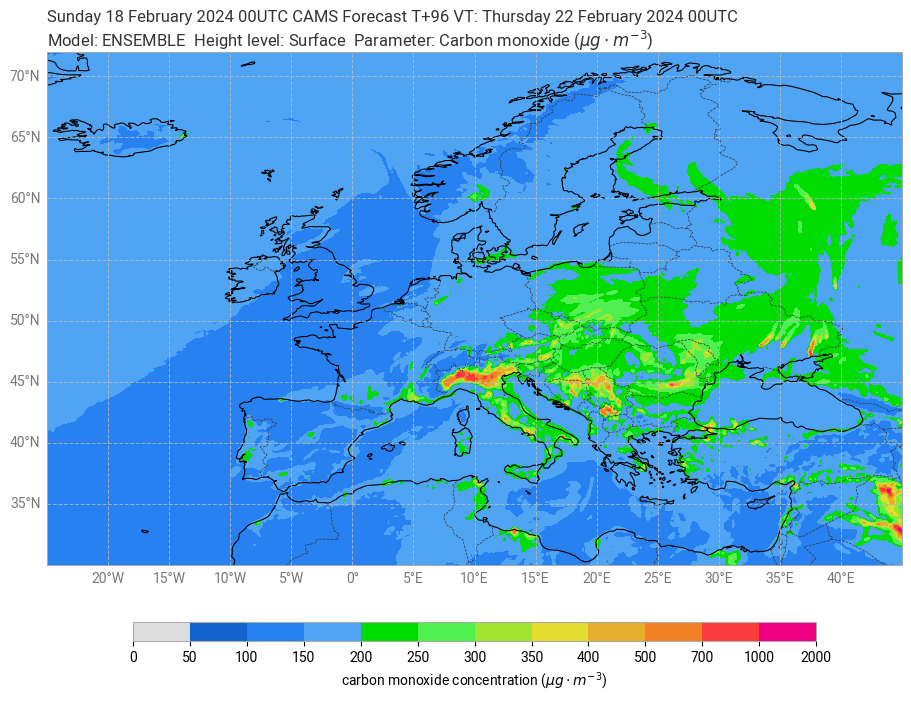

In [5]:
chart = earthkit.plots.Map()

chart.contourf(data, style=style)

chart.coastlines(color="black")
chart.borders()

chart.title(
    "{base_time:%A %-d %B %Y %HUTC} CAMS Forecast T+{lead_time} VT: {valid_time:%A %-d %B %Y %HUTC}\n"
    "Model: ENSEMBLE  Height level: Surface  Parameter: Carbon monoxide ({units})",
    horizontalalignment="left",
    x=0,
)
chart.gridlines(linestyle="--", xstep=5, ystep=5)

chart.legend(label="carbon monoxide concentration ({units})")

chart.show()